# Project Part 2 :

In [2]:
import numpy as np
import matplotlib.pyplot as plt

* Defining convolutional_encoder: 

In [3]:
def Convolutional_Encoder(Input_Bits, G1, G2, G3):
    # Initial state
    State = [0, 0, 0]  
    Output_Bits = []
    for Bit in Input_Bits:
        # Shift the state and update with the current input bit
        State = [Bit]+State[:-1]
        # Calculate the output bits using the generator polynomials
        Output_Bit_1 = sum(a * b for a, b in zip(G1,State)) % 2
        Output_Bit_2 = sum(a * b for a, b in zip(G2,State)) % 2
        Output_Bit_3 = sum(a * b for a, b in zip(G3,State)) % 2
        # Append the output bits to the result
        Output_Bits.extend([Output_Bit_1,Output_Bit_2,Output_Bit_3])
        # Add zeros to reset the state 
    State= [0, 0, 0]

    return Output_Bits

* Define a function for zero Padding : 

In [4]:
def apply_zero_padding(output_bits, zero_padding):
    # Add zeros for zero padding
    output_bits.extend([0] * zero_padding)
    return output_bits

* Testing the Convolutional_Encoder function : 

In [5]:
G1 = [1, 1, 1]
G2 = [1, 0, 1]
G3 = [1, 1, 0]
# Example input block
input_block = [1, 0, 1, 1, 0]
# Encode the input block
encoded_block = Convolutional_Encoder(input_block, G1, G2, G3)
# Display the result
print("Input Block:", input_block)
print("Input Block:", len(input_block))
print("Encoded Block:", encoded_block)
print("Encoded Block:", len(encoded_block))
######################################################################
# Set zero padding amount
zero_padding_amount = 3
# Apply zero padding
encoded_block_with_padding = apply_zero_padding(encoded_block,zero_padding_amount)
# Display the result after zero padding
print("Encoded Block (with zero padding):", encoded_block_with_padding)
print("Encoded Block Length (with zero padding):", len(encoded_block_with_padding))

Input Block: [1, 0, 1, 1, 0]
Input Block: 5
Encoded Block: [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
Encoded Block: 15
Encoded Block (with zero padding): [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]
Encoded Block Length (with zero padding): 18


* Defining add_awgn_noise: 

In [6]:
def add_awgn_noise(encoded_block, snr_dB):
    # Calculate noise power based on SNR (in dB)
    snr = 10**(snr_dB / 10.0)
    noise_power = 1 / snr
    # Generate AWGN with the same length as the encoded block
    noise = np.sqrt(noise_power)*np.random.randn(len(encoded_block))
    # Add noise to the encoded block
    noisy_encoded_block = np.array(encoded_block) + noise
    # Clip values to ensure they remain within [0, 1]
    noisy_encoded_block = np.clip(noisy_encoded_block, 0, 1)

    return list(noisy_encoded_block)

* Testing the add_awgn_noise : 

In [52]:
#  SNR (in dB)
snr_dB = 10
# Add AWGN to the encoded block
noisy_encoded_block = add_awgn_noise(encoded_block,snr_dB)
noisy_encoded_block_with_padding = add_awgn_noise(encoded_block_with_padding, snr_dB)
# Display the result
print("Noisy Encoded Block:", noisy_encoded_block)

Noisy Encoded Block: [1.0, 0.9117960568526715, 0.7766624821761787, 1.0, 0.0, 1.0, 0.23828593397605863, 0.3230467238896479, 0.9985790723937825, 0.32485942313143057, 1.0, 0.0, 0.34180033506962443, 0.9320716855790627, 0.4308864192558377, 0.3292268852922691, 0.0, 0.20860746649148781]


* Calculating the BER : 

In [7]:
def calculate_ber(original_bits, received_bits):
    # Ensure both arrays have the same length
    if len(original_bits)!= len(received_bits):
        raise ValueError("Original and received bits must have the same length.")
    # Calculate the number of bit errors
    num_errors = np.sum(original_bits != received_bits)
    # Calculate the BER
    ber = num_errors / len(original_bits)

    return ber

* Implementation of hard decision viterbi decoder : 

In [8]:
def hard_decision_viterbi_decoder(received_symbols, trellis):
   
    num_states, num_inputs = trellis.shape
    num_symbols = len(received_symbols) // num_inputs
    
    # Initialize data structures
    state_metrics = np.zeros((num_states, num_symbols + 1))
    survivor_paths = np.zeros((num_states, num_symbols + 1), dtype=int)
    
    # Process each symbol
    for i in range(1, num_symbols + 1):
        received_symbol = received_symbols[(i - 1) * num_inputs:i * num_inputs]
        # Calculate branch metrics
        branch_metrics = np.sum(np.abs(trellis - received_symbol) ** 2, axis=1)
        # Update state metrics and survivor paths
        for state in range(num_states):
            metrics = state_metrics[:, i - 1] + branch_metrics
            best_prev_state = np.argmin(metrics)
            state_metrics[state, i] = metrics[best_prev_state]
            survivor_paths[state, i] = best_prev_state
    # Traceback to find the best path
    best_path_end_state = np.argmin(state_metrics[:, -1])
    decoded_symbols = np.zeros(num_symbols, dtype=int)

    for i in range(num_symbols, 0, -1):
        decoded_symbols[i - 1] = survivor_paths[best_path_end_state, i]
        best_path_end_state = decoded_symbols[i - 1]

    return decoded_symbols

* Testing of Hard decision Viterbi function : 

In [56]:
#trellis = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
# Decode using hard decision Viterbi decoder
#decoded_symbols_with_zero_padding= hard_decision_viterbi_decoder(noisy_encoded_block_with_padding, trellis)
# Display the result
#print(" noisy_encoded_block_with_padding :", noisy_encoded_block_with_padding)
#print("decoded_symbols_with_zero_padding:", decoded_symbols_with_zero_padding)

# Decode using hard decision Viterbi decoder
#decoded_symbols = hard_decision_viterbi_decoder(noisy_encoded_block, trellis)
# Display the result
#print(" noisy_encoded_block:", noisy_encoded_block)
#print(" decoded_symbols:", decoded_symbols)

* Plottting the BER VS SNR Before using Convolutional Codes and After for 3 different SNR Values and for a Range of Values   : 

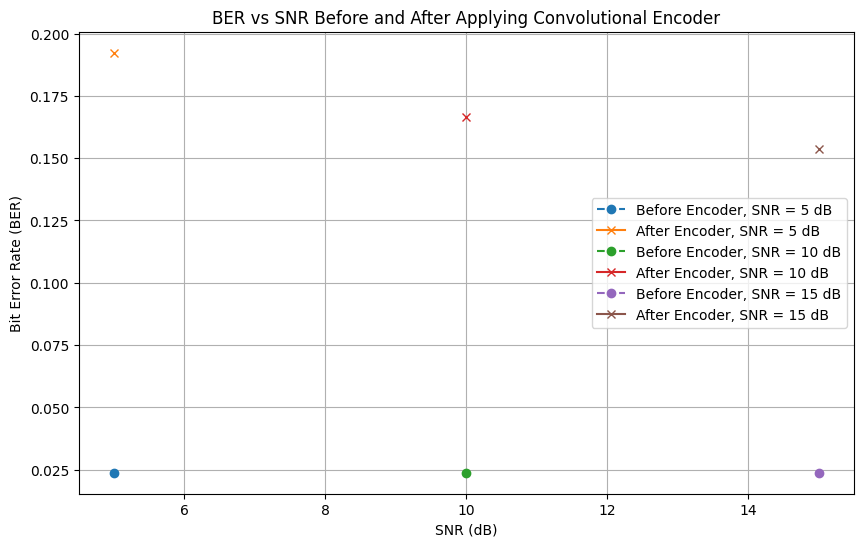

In [10]:
# Simulation parameters
g1 = [1, 1, 1]
g2 = [1, 0, 1]
g3 = [1, 1, 0]
trellis = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
block_size = 100
zero_padding = 30
snr_values = [5, 10, 15]

# Plot results for specific SNR values
plt.figure(figsize=(10, 6))

for snr in snr_values:
    input_block = [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0]
    
    # Before applying Convolutional Encoder
    input_block_with_padding = apply_zero_padding(input_block, zero_padding)
    noisy_input_block = add_awgn_noise(input_block_with_padding, snr)[:len(input_block_with_padding)]
    ber_before = calculate_ber(input_block_with_padding, noisy_input_block)

    # After applying Convolutional Encoder
    encoded_block = Convolutional_Encoder(input_block, g1, g2, g3)
    encoded_block_with_padding = apply_zero_padding(encoded_block, zero_padding)
    noisy_encoded_block = add_awgn_noise(encoded_block_with_padding, snr)[:len(encoded_block_with_padding)]
    decoded_bits = hard_decision_viterbi_decoder(noisy_encoded_block, trellis)
    input_block_with_padding = apply_zero_padding(input_block, len(decoded_bits) - len(input_block))
    ber_after = calculate_ber(input_block_with_padding, decoded_bits)

    plt.plot(snr, ber_before, marker='o', label=f'Before Encoder, SNR = {snr} dB', linestyle='--')
    plt.plot(snr, ber_after, marker='x', label=f'After Encoder, SNR = {snr} dB')

plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR Before and After Applying Convolutional Encoder')
plt.legend()
plt.grid(True)
plt.show()

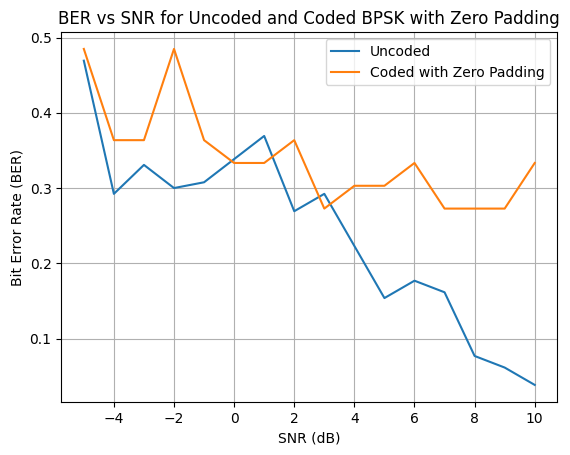

In [45]:
# Simulation parameters
g1 = [1, 1, 1]
g2 = [1, 0, 1]
g3 = [1, 1, 0]
trellis = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
block_size = 100
zero_padding = 30
snr_range = np.arange(-5, 11, 1)

# Simulate BER versus SNR for convolutional coding
coded_ber = []
for snr in snr_range:
    input_block = [1,0,1,0,1,1,1,0,0,1,1,0]
    encoded_block = Convolutional_Encoder(input_block, g1, g2, g3)
    encoded_block_with_padding = apply_zero_padding(encoded_block, zero_padding)
    noisy_encoded_block = add_awgn_noise(encoded_block_with_padding, snr)[:len(encoded_block_with_padding)]
    decoded_bits = hard_decision_viterbi_decoder(noisy_encoded_block, trellis)
    # Add zero-padding to the input block for compatibility
    input_block_with_padding = apply_zero_padding(input_block, len(decoded_bits) - len(input_block))
    ber = calculate_ber(input_block_with_padding, decoded_bits)
    coded_ber.append(ber)
# Simulate BER versus SNR for uncoded scenario
uncoded_ber = []
for snr in snr_range:
    uncoded_input_block = np.random.randint(0, 2, block_size + zero_padding)
    noisy_uncoded_block = add_awgn_noise(uncoded_input_block, snr)[:len(uncoded_input_block)]
    decoded_bits_uncoded = np.round(noisy_uncoded_block)
    ber_uncoded = calculate_ber(uncoded_input_block, decoded_bits_uncoded)
    uncoded_ber.append(ber_uncoded)
# Plot results
plt.plot(snr_range, uncoded_ber, label='Uncoded')
plt.plot(snr_range, coded_ber, label='Coded with Zero Padding')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for Uncoded and Coded BPSK with Zero Padding')
plt.legend()
plt.grid(True)
plt.show()